In [1]:
!pip install emoji

     |████████████████████████████████| 174 kB 20.3 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=0ce0e1dd00a4733da251121a30fe30c1efd88969d41f21e64500c6132f34d923
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [2]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 7.8 MB/s 


In [3]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import string
import emoji
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [5]:
tweets = pd.read_csv("cyberbullying_tweets.csv")

In [6]:
tweets.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [7]:
tweets['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
#remove stopwords
stop_words = set(stopwords.words('english'))
stop_words.remove("not")
stop_words.add("rt") #for twitter retweet
stop_words.remove("against")
# stop_words

In [10]:
twitter_string = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [11]:
tweets["processed_tweet"] = tweets["tweet_text"].str.lower()

In [12]:
#remove tags to people and 
# retweet links of the people 
# and also remove stopwords
# and convert emoji to words

tweets["processed_tweet"] = tweets["processed_tweet"] \
                            .apply(lambda x: re.sub(twitter_string,' ', x)) \
                            .apply(lambda x : [value for value in x.split(" ") if not value.startswith("@") and value not in stop_words]) \
                            .apply(lambda x : ' '.join(x)) \
                            .apply(lambda x : x.translate(str.maketrans('', '', string.punctuation))) \
                            .apply(lambda x: emoji.demojize(x)) 

In [13]:
tweets.to_csv("Intermediate_file.csv")

In [14]:
tweets

,tweet_text,cyberbullying_type,processed_tweet
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks heads not concerned another ang...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account like...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black ppl expected anything depended anything ...
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner not withhold disappointment turner call...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch got bleach hair re...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck therealexel youre nigger fucking unfo...


# Exploratory Data Analysis

In [15]:
!pip install WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [16]:
#To display count of each type of cyberbullying record that we have and individual counts

import plotly.express as px
fig = px.bar(tweets.cyberbullying_type.value_counts(),text=tweets.cyberbullying_type.value_counts(), color_discrete_sequence=px.colors.qualitative.D3, custom_data=[tweets.cyberbullying_type.value_counts()])
fig.update_traces(hovertemplate='<br><b>Total: </b>%{customdata[0]}')
fig.update_layout(title='Cyberbullying types',
                 template='seaborn',
                 hovermode='x unified',
                 xaxis=dict(title='Cyberbullying Type'),
                 yaxis=dict(title='Tweet Count'),
                 showlegend=True)


fig.show()

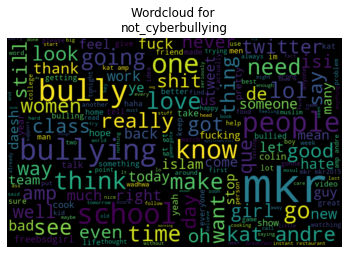

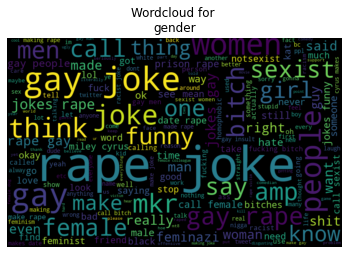

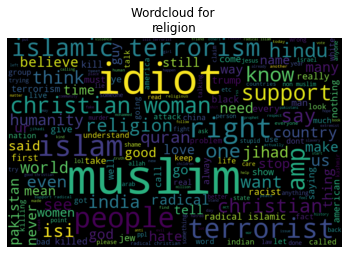

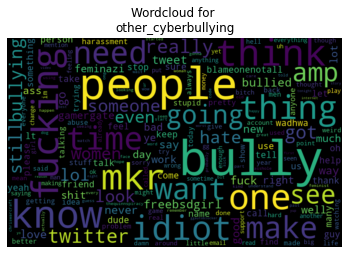

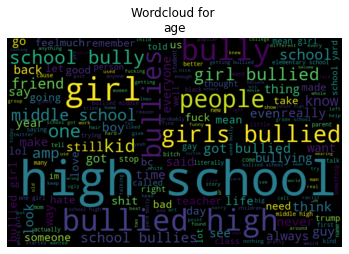

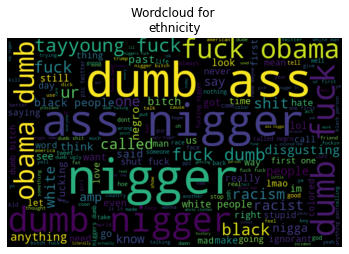

In [17]:
for cyber_type in tweets.cyberbullying_type.unique():
  allwords = ' '.join([twts for twts in tweets.processed_tweet[tweets.cyberbullying_type==cyber_type]])
  wordCloud = WordCloud(width=800,height=500,random_state=21,max_font_size=115).generate(allwords)
 
  plt.imshow(wordCloud, interpolation="bilinear")
  plt.axis('off')
  plt.title("Wordcloud for \n"+ cyber_type)
  plt.show()


# Sentiment Analysis

In [18]:
sid_obj = SentimentIntensityAnalyzer()

In [19]:
tweets['sentiments'] = tweets['processed_tweet'].apply(lambda x: sid_obj.polarity_scores(str(x)))

In [20]:
tweet_sentiment = tweets['sentiments'].apply(pd.Series)

In [21]:
tweets = tweets.merge(tweet_sentiment, left_index=True, right_index=True)

In [22]:
tweets.head()

,tweet_text,cyberbullying_type,processed_tweet,sentiments,neg,neu,pos,compound
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious mkr,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes,"{'neg': 0.422, 'neu': 0.294, 'pos': 0.284, 'co...",0.422,0.294,0.284,-0.3400
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks heads not concerned another ang...,"{'neg': 0.094, 'neu': 0.504, 'pos': 0.403, 'co...",0.094,0.504,0.403,0.6488
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account like...,"{'neg': 0.239, 'neu': 0.427, 'pos': 0.333, 'co...",0.239,0.427,0.333,0.0258


In [23]:
tweets.rename(columns = {"neu":"Neutral", "negative":"Negative", "pos":"Positive", "compound":"Total_Sentiment_Score"}, inplace=True)

In [24]:
tweets.head()

,tweet_text,cyberbullying_type,processed_tweet,sentiments,neg,Neutral,Positive,Total_Sentiment_Score
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious mkr,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes,"{'neg': 0.422, 'neu': 0.294, 'pos': 0.284, 'co...",0.422,0.294,0.284,-0.3400
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks heads not concerned another ang...,"{'neg': 0.094, 'neu': 0.504, 'pos': 0.403, 'co...",0.094,0.504,0.403,0.6488
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account like...,"{'neg': 0.239, 'neu': 0.427, 'pos': 0.333, 'co...",0.239,0.427,0.333,0.0258


# TFIDF Matrix

In [25]:
#Importing TFIDFVectorizer
#min_df value determines lower base limit of tfidf value
#Max_features can be regulated to limit maximum columns of tfidf
from sklearn.feature_extraction.text import TfidfVectorizer  
v = TfidfVectorizer(max_features=1000,min_df=0.005,max_df=1.0,analyzer='word')

In [26]:
#Storing tfidf values using processed tweets column as train set
x = v.fit_transform(tweets['processed_tweet'])
tokens=v.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [27]:
#Creating TFIDF table dataframe using sentences vs processed tweets 

df_tfidfvect = pd.DataFrame(data = x.toarray(),index =tweets['tweet_text'],columns=tokens)

In [28]:
print(df_tfidfvect)
df_tfidfvect.to_csv("TFIDF_Matrix.csv")

                                                     10  abuse  act  actually  \
tweet_text                                                                      
In other words #katandandre, your food was crap...  0.0    0.0  0.0       0.0   
Why is #aussietv so white? #MKR #theblock #ImAC...  0.0    0.0  0.0       0.0   
@XochitlSuckkks a classy whore? Or more red vel...  0.0    0.0  0.0       0.0   
@Jason_Gio meh. :P  thanks for the heads up, bu...  0.0    0.0  0.0       0.0   
@RudhoeEnglish This is an ISIS account pretendi...  0.0    0.0  0.0       0.0   
...                                                 ...    ...  ...       ...   
Black ppl aren't expected to do anything, depen...  0.0    0.0  0.0       0.0   
Turner did not withhold his disappointment. Tur...  0.0    0.0  0.0       0.0   
I swear to God. This dumb nigger bitch. I have ...  0.0    0.0  0.0       0.0   
Yea fuck you RT @therealexel: IF YOURE A NIGGER...  0.0    0.0  0.0       0.0   
Bro. U gotta chill RT @CHILL

In [29]:
df_tfidfvect.head()
df_tfidfvect.to_csv("TFIDF.csv")

# Feature Engineering

In [30]:
df_tfidfvect.reset_index()
df_feature= pd.merge(tweets,df_tfidfvect, how="left", on=["tweet_text", "tweet_text"])
df_feature.head()


,tweet_text,cyberbullying_type,processed_tweet,sentiments,neg,Neutral,Positive,Total_Sentiment_Score,10,abuse,...,would,wow,wrong,ya,yeah,year,years,yes,yet,yo
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious mkr,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes,"{'neg': 0.422, 'neu': 0.294, 'pos': 0.284, 'co...",0.422,0.294,0.284,-0.3400,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks heads not concerned another ang...,"{'neg': 0.094, 'neu': 0.504, 'pos': 0.403, 'co...",0.094,0.504,0.403,0.6488,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks heads not concerned another ang...,"{'neg': 0.094, 'neu': 0.504, 'pos': 0.403, 'co...",0.094,0.504,0.403,0.6488,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
label= {'not_cyberbullying': 0,
             'gender': 1,
             'religion': 2,
             'other_cyberbullying': 3,
             'age': 4,
             'ethnicity': 5}
df_feature['cyberbullying_type'] = df_feature.cyberbullying_type.replace(label)
df_feature.head()

,tweet_text,cyberbullying_type,processed_tweet,sentiments,neg,Neutral,Positive,Total_Sentiment_Score,10,abuse,...,would,wow,wrong,ya,yeah,year,years,yes,yet,yo
0,"In other words #katandandre, your food was cra...",0,words katandandre food crapilicious mkr,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,aussietv white mkr theblock imacelebrityau tod...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,@XochitlSuckkks a classy whore? Or more red ve...,0,classy whore red velvet cupcakes,"{'neg': 0.422, 'neu': 0.294, 'pos': 0.284, 'co...",0.422,0.294,0.284,-0.3400,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,meh p thanks heads not concerned another ang...,"{'neg': 0.094, 'neu': 0.504, 'pos': 0.403, 'co...",0.094,0.504,0.403,0.6488,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"@Jason_Gio meh. :P thanks for the heads up, b...",0,meh p thanks heads not concerned another ang...,"{'neg': 0.094, 'neu': 0.504, 'pos': 0.403, 'co...",0.094,0.504,0.403,0.6488,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Development

In [32]:
X=df_feature.iloc[:,4:368]
y=df_feature.iloc[:,1:2]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=555)

### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=0,criterion='gini')
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(random_state=0)

In [35]:
y_pred = rf.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.773852


### Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,splitter='best', criterion='gini')
clf = clf.fit(X_train,y_train)

In [37]:
y_pred = clf.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.747992


### Bagging Classifier

In [51]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc = bc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [52]:
y_pred = bc.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.763273


### Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc = gbc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [39]:
y_pred = gbc.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.792921


### Histogram based gradient boosting classifier

In [40]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
hgbc=GradientBoostingClassifier()
hgbc = hgbc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [41]:
y_pred = hgbc.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.793182


### XGBoost

In [42]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb=xgb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [43]:
y_pred = xgb.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.790374


### LightGBM

In [44]:
import lightgbm
from lightgbm import LGBMClassifier
Lgbm=XGBClassifier()
Lgbm=Lgbm.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [45]:
y_pred = Lgbm.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.790374


## CatBoost

In [46]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 57 kB/s 


In [47]:
import catboost
from catboost import CatBoostClassifier
cb=CatBoostClassifier(verbose=0, n_estimators=100)
cb=cb.fit(X_train,y_train)

In [48]:
y_pred = cb.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.786456


### Adaboost

In [49]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100)
abc=abc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [50]:
y_pred =abc.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.765167
